# 군집 (Clustering)

## 1) 비계층적 군집 분석
- 대표적으로 K-Means
- K-평균군집(centroid), 임의의 지점 k개를 선택해 해당 중심에 가까운 데이터를 군집화하는 방법
- n_clusters 하이퍼파라미터 반드시 설정!


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
from sklearn.datasets import load_wine
dataset = load_wine()
data = pd.DataFrame(dataset.data, columns= dataset.feature_names)
df = data.copy()

In [3]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

/Users/jean/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [4]:
pred = kmeans.predict(df)
pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2], dtype=int32)

In [5]:
#실제값, 예측값 비교

df['target'] = dataset.target
df['pred'] = pred
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,pred
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,0


In [6]:
df.groupby(['pred','target']).size().reset_index(name='count')

,pred,target,count
0,0,0,13
1,0,1,20
2,0,2,29
3,1,0,46
4,1,1,1
5,2,1,50
6,2,2,19


target, pred 가 많이 다르다 (각각의 0,1,2는 다른 의미이다. pred의 0,1,2는 그냥 단순히 군집에 대한 번호임)

## 절차 :  PCA로 feature를 2개로 줄인다 -> 군집화 -> 시각화

In [7]:
# 1. PCA
from sklearn.decomposition import PCA


df =data.copy()
pca = PCA(n_components=2)
df = pca.fit_transform(df)
df = pd.DataFrame(df)
df.head()

,0,1
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995


In [8]:
# 2. 군집화
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
pred = kmeans.predict(df)
df['kmeans'] = pred
df

/Users/jean/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,0,1,kmeans
0,318.562979,21.492131,1
1,303.097420,-5.364718,1
2,438.061133,-6.537309,1
3,733.240139,0.192729,1
4,-11.571428,18.489995,0
...,...,...,...
173,-6.980211,-4.541137,0
174,3.131605,2.335191,0
175,88.458074,18.776285,0
176,93.456242,18.670819,0


In [9]:
# 3) 각 군집의 중심점을 잡아주기

centers = kmeans.cluster_centers_

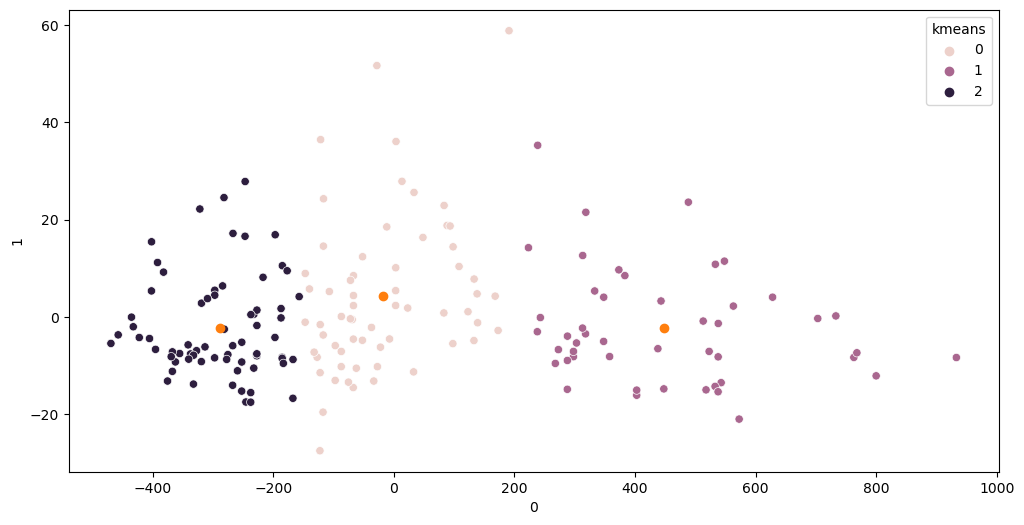

In [10]:
# 4) 시각화

plt.figure(figsize=(12, 6))
sns.scatterplot(x= df.iloc[:,0], y=df.iloc[:,1], hue=df['kmeans'])
plt.scatter(centers[:,0], centers[:,1])

주황색 점이 중심점(centers)이다

## (참고) 클러스터 갯수 찾는 방법 (엘보우 방법, elbow method)

/Users/jean/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jean/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jean/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jean/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

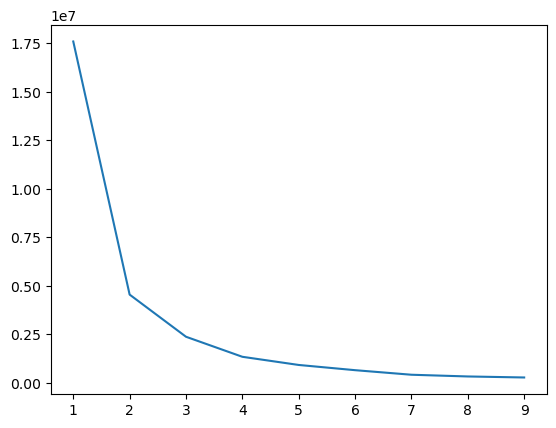

In [11]:
# 군집 수 찾기

df.columns = df.columns.astype(str)

inertia = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=2022)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1,10), inertia);

## 2) 계층적 군집분석
- k-means와 달리 군집개수를 사전에 설정하지 않음
- 덴드로그램

In [12]:
from scipy.cluster.hierarchy import dendrogram, ward

In [14]:
#PCA

df = data.copy()
pca = PCA(n_components=2)
df = pca.fit_transform(df)
df = pd.DataFrame(df)

In [15]:
# Sampling (타겟별로 3개씩만 샘플링하기)

dataset.target[:3]

array([0, 0, 0])

In [16]:
dataset.target[70:73]

array([1, 1, 1])

In [17]:
dataset.target[160:163]

array([2, 2, 2])

In [18]:
kdata = df[:3].copy()
kdata = pd.concat([kdata, df[70:73]])
kdata = pd.concat([kdata, df[160:163]])
kdata

,0,1
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
70,123.130138,1.059835
71,-337.104122,-7.623855
72,-275.096026,-7.753152
160,-227.068836,-7.618630
161,-66.755431,8.470290
162,-176.765098,9.473190


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [75.0, 75.0, 85.0, 85.0],
  [43.75, 43.75, 80.0, 80.0],
  [12.5, 12.5, 61.875, 61.875]],
 'dcoord': [[0.0, 30.991512411472076, 30.991512411472076, 0.0],
  [0.0, 147.87787795984818, 147.87787795984818, 30.991512411472076],
  [0.0, 48.027378522151096, 48.027378522151096, 0.0],
  [0.0, 88.07194000276097, 88.07194000276097, 48.027378522151096],
  [0.0, 135.87135248973317, 135.87135248973317, 88.07194000276097],
  [0.0, 190.03011431770926, 190.03011431770926, 0.0],
  [135.87135248973317,
   461.0158736911469,
   461.0158736911469,
   190.03011431770926],
  [147.87787795984818,
   1026.3965443828536,
   1026.3965443828536,
   461.0158736911469]],
 'ivl': ['2', '0', '1', '4', '8', '5', '6', '3', '7'],
 'leaves': [2, 0, 1, 4, 8, 5, 6, 3, 7],
 'color_list': ['C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C1', 

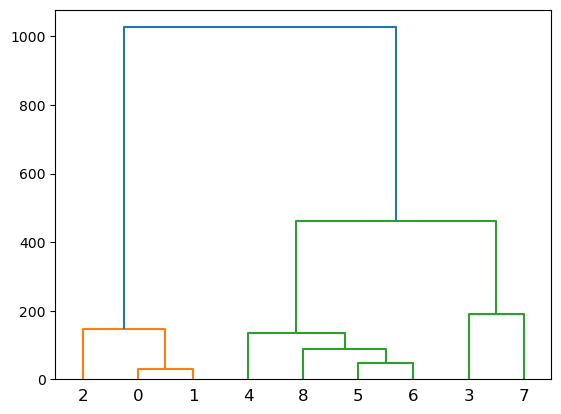

In [19]:
#덴드로그램
#linkage : 거리정보

linkage = ward(kdata)
dendrogram(linkage)